In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-27-17-40-23.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

,Unnamed: 0,datetime,charge_solar,charge_load,discharge_size,current_solar,current_controlled_load_consumption,current_general_electricity_consumption,current_charge
0,0,2012-01-08 00:30:00,0.692066,0.000000,0.994145,0.0,1.250,0.109,0.000000
1,1,2012-01-08 01:00:00,0.215464,0.000000,0.991662,0.0,1.238,0.299,0.000000
2,2,2012-01-08 01:30:00,0.175202,0.274762,0.821917,0.0,1.256,0.375,0.000000
3,3,2012-01-08 02:00:00,0.253777,0.000000,0.941284,0.0,1.150,0.978,0.000000
4,4,2012-01-08 02:30:00,0.955589,0.000000,0.790601,0.0,0.131,1.027,0.000000
...,...,...,...,...,...,...,...,...,...
241,234,2012-01-12 21:30:00,0.089405,0.004355,0.969856,0.0,0.000,0.290,0.675501
242,235,2012-01-12 22:00:00,0.520081,0.827496,0.932901,0.0,0.000,0.284,0.537503
243,236,2012-01-12 22:30:00,0.061197,0.000000,0.977171,0.0,0.000,0.283,0.694171
244,237,2012-01-12 23:00:00,0.457871,0.790751,0.928147,0.0,0.000,0.874,0.071853


In [38]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

,datetime,variable,value
0,2012-01-08 00:30:00,charge_solar,0.692066
1,2012-01-08 01:00:00,charge_solar,0.215464
2,2012-01-08 01:30:00,charge_solar,0.175202
3,2012-01-08 02:00:00,charge_solar,0.253777
4,2012-01-08 02:30:00,charge_solar,0.955589
...,...,...,...
1717,2012-01-12 21:30:00,current_charge,0.675501
1718,2012-01-12 22:00:00,current_charge,0.537503
1719,2012-01-12 22:30:00,current_charge,0.694171
1720,2012-01-12 23:00:00,current_charge,0.071853


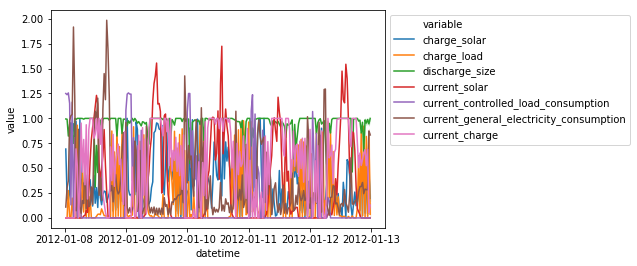

In [39]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

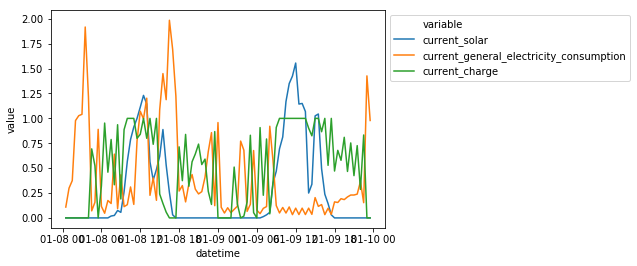

In [40]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "current_general_electricity_consumption"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

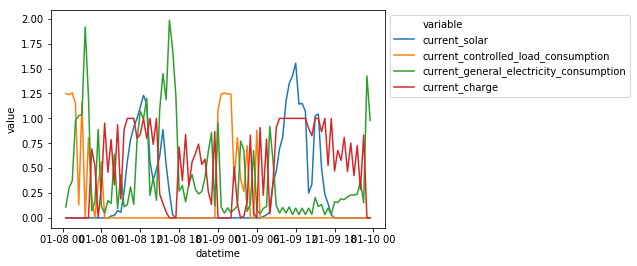

In [41]:
see_status = results_long[results_long['variable'].isin(["current_charge", "current_general_electricity_consumption", "current_controlled_load_consumption","current_solar"])]

sns.lineplot(data=see_status[see_status.datetime<"2012-01-10"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)